# ZADANIE 3

Łączenie procesów Poissona

Mając 2 niezależne niejednorodne procesy Poissona stwórz proces składający się z połączenia wszystkich zdarzeń obu. Sprawdź, że jego intensywność jest sumą 2 oryginalnych intensywności.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
def lambda_func_1(t):
    return t**2

def lambda_func_2(t):
    return t

Metoda generowania przerzedzania

In [20]:
def thinnig_method(lambda_function, T):
    times = []
    t = 0
    I = 0
    
    while True:
        U1 = np.random.rand()
        if lambda_function(t) == 0:
            t += 1
            continue
        t += -1 / lambda_function(t) * np.log(U1)
        
        if t > T:
            break
        
        U2 = np.random.rand()
        if U2 <= 1:
            I += 1
            times.append(t)
    
    return times, I

In [21]:
czasy_1, Nt_1 = thinnig_method(lambda_func_1, 10)
czasy_2, Nt_2 = thinnig_method(lambda_func_2, 10)

polaczone = np.sort(np.concatenate((czasy_1, czasy_2)))

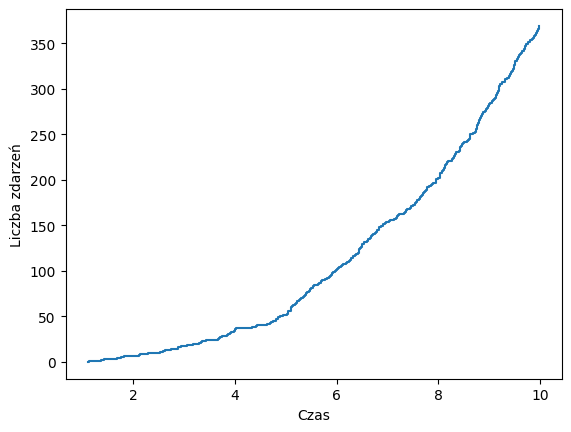

In [25]:
y_values = np.arange(len(polaczone))

plt.step(polaczone, y_values, where='post')
plt.xlabel('Czas')
plt.ylabel('Liczba zdarzeń')
plt.show()

In [28]:
def theoretical_expected_value(lambda_function, T):
    return np.trapz([lambda_function(t) for t in np.linspace(0, T, 1000)], dx=T/1000)

intensywnosc_1 = theoretical_expected_value(lambda_func_1, 10)
intensywnosc_2 = theoretical_expected_value(lambda_func_2, 10)
suma_intensywnosci = theoretical_expected_value(lambda t: lambda_func_1(t) + lambda_func_2(t), 10)


In [29]:
print(intensywnosc_1)
print(intensywnosc_2)
print(suma_intensywnosci)

333.0001668335002
49.95
382.95016683350013
